# Image scrambling 

This code provides functions and examples on how to scramble images.  

We follow Albers' method for image scrambling, consisting of shuffling patches and applying transformations with Jan Koenderink's Eidolon factory:

"_For spatial scrambling (S-images), the images were divided in smaller sections of 60*60 pixels, as schematically indicated with the yellow lines (Fig. 1D), to preserve the local information. The smaller sections were spatially shuffled and subsequently the images were modulated with the “Eidolon factory (Koenderink, Valsecchi, van Doorn, Wagemans, & Gegenfurtner, 2017)._" [Albers, 2020](https://doi.org/10.1016/j.visres.2020.08.005).


This code is based on the official implementation of the Eidolon Factory by Jan Koenderink, available at
[https://github.com/gestaltrevision/Eidolon](https://github.com/gestaltrevision/Eidolon)
"""

First, let's import the required functions and libraries that we are going to use in the code. 

In [1]:
import os

import numpy as np 

from PIL import Image
import cv2

from eidolonfactory.picture import Picture
from image_scrambling import shuffle_image_patches, CoherentDisarrayOfEdgesOpponentChannels
from utils import imshow

We define the path of the image to modify and the path of the directory where we will save the results.

In [2]:
# Define image path and results directory
img_path = "images/"
img_name = 'nicholas-roerich_tent-mountain-1933.jpg'
save_dir = "results/image_scrambling/"
os.makedirs(save_dir, exist_ok=True)

Let's read and display the original image:

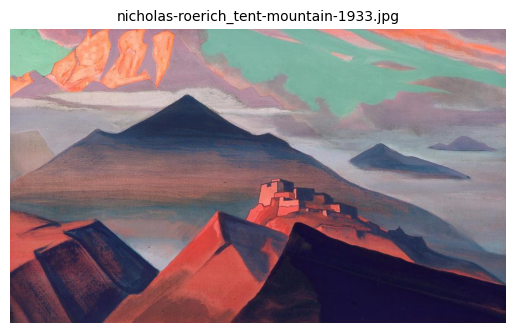

In [3]:
# Read image and check image size
img = Image.open(img_path + img_name)
w, h = img.size
aspectRatio = float(h) / w

# Plot original image
imshow(cv2.imread(img_path + img_name)[:, :, ::-1], img_name)

Now let's divide the image in non-overlapping rectangular patches and let's shuffle the patches, following Albers' approach. The shuffled image will be saved in the _save_dir_ folder. 

In [4]:
# Shuffle patches
n_patches = 1000
shuffled_img_path = f"{save_dir}{img_name.replace('.jpg', '')}_{n_patches}_shuffled_patches.jpg"
shuffle_image_patches(img, shuffled_img_path, n_patches)

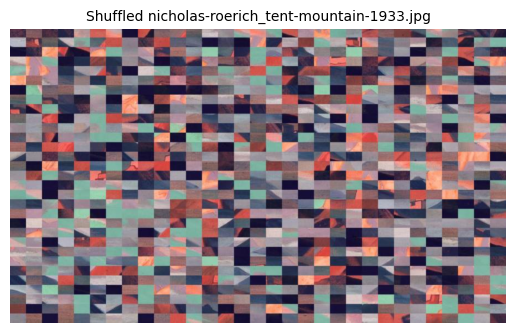

In [5]:
# Plot shuffled image
imshow(cv2.imread(shuffled_img_path)[:, :, ::-1], "Shuffled "+img_name)

Finally, here we transform the shuffled image using the Eidolon factory and display the final result. This is also saved in the _save_dir_ folder. 

Here, we define some parameters needed for the Eidolons transformation. You can try to vary "REACH" and "GRAIN".

In [6]:
# Image parameters to set for the Eidolons
SZ = w if aspectRatio <= 1 else h
MIN_SIGMA = 1 / np.sqrt(2)
MAX_SIGMA = SZ / 4.0
SIGMA_FACTOR = np.sqrt(2)

# Parameters for the Eidolon factory
REACH = 10.0
GRAIN = 10.0

In [7]:
# Apply Eidolon factory (Coherent Disarray Of Edges) and save the result
pic = Picture(shuffled_img_path, SZ, MIN_SIGMA, MAX_SIGMA, SIGMA_FACTOR)
im = CoherentDisarrayOfEdgesOpponentChannels(pic, REACH, GRAIN)
result_img_path = save_dir + f"{img_name.replace('.jpg', '')}_{int(REACH)}_{int(GRAIN)}.jpg"
im.save(result_img_path)

Embarking on coherent disarray of edges opponent channels
Computing eidolon...
BLACK-WHITE disarray going on...
RED_GREEN disarray going on...
YELLOW_BLUE disarray going on...
Opponent representation to RGB-image...


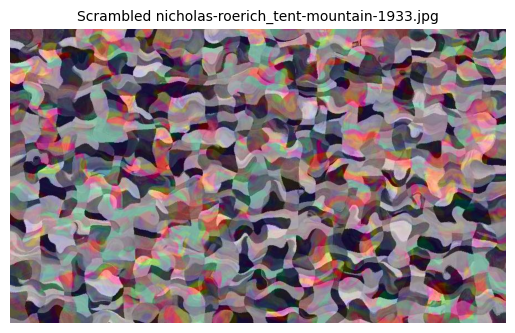

In [8]:
# Plot result
imshow(cv2.imread(result_img_path)[:, :, ::-1], "Scrambled "+img_name)